In [24]:
# Importamos las librerías necesarias
import numpy as np                # Sirve para trabajar con números y matrices
import pandas as pd              # Sirve para manejar datos en forma de tablas (como hojas de Excel)
from sklearn.preprocessing import StandardScaler  # Para normalizar o escalar los datos
from sklearn.decomposition import PCA              # Para aplicar el método de reducción de dimensiones llamado PCA
import matplotlib.pyplot as plt   # Para hacer gráficos




In [25]:
# --------------------------
# 0. Generación de datos de ejemplo
# --------------------------

# Fijamos una "semilla" para que los datos aleatorios siempre sean los mismos (útil para reproducir resultados)
np.random.seed(42)

# Creamos una tabla de datos con 100 filas (observaciones) y 5 columnas (características o variables)
data = np.random.rand(100, 5)  # Cada valor es un número aleatorio entre 0 y 1
df = pd.DataFrame(data, columns=[f'Feature_{i+1}' for i in range(5)])  # Creamos un DataFrame con nombres de columnas como "Feature_1", "Feature_2", etc.

In [26]:
# --------------------------
# 1. Estandarización de los datos
# --------------------------

# El escalado o estandarización sirve para que todas las variables estén en la misma escala.
# Esto es importante porque algunas técnicas (como PCA) funcionan mejor si los datos tienen media 0 y varianza 1.
scaler = StandardScaler()               # Creamos el objeto que se encargará de escalar
scaled_data = scaler.fit_transform(df) # Ajustamos el escalador a nuestros datos y los transformamos

In [27]:
# --------------------------
# 2. Aplicación del Análisis de Componentes Principales (PCA)
# --------------------------

# PCA es un método que resume los datos en menos variables (llamadas "componentes principales") sin perder mucha información.
# En este caso, vamos a reducir de 5 variables a 2 componentes principales.
pca = PCA(n_components=2)                     # Indicamos que queremos quedarnos con solo 2 componentes
principal_components = pca.fit_transform(scaled_data)  # Aplicamos PCA a los datos escalados

# Guardamos las nuevas variables (componentes principales) en un nuevo DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PrincipalComponent 1', 'PrincipalComponent 2'])

In [28]:
# --------------------------
# 3. Cuánta información explica cada componente
# --------------------------

# Esta línea nos dice qué porcentaje de la información original se conserva en cada componente principal
explained_variance = pca.explained_variance_ratio_

# Mostramos los nombres de las nuevas columnas
print(pca_df.columns)

Index(['PrincipalComponent 1', 'PrincipalComponent 2'], dtype='object')


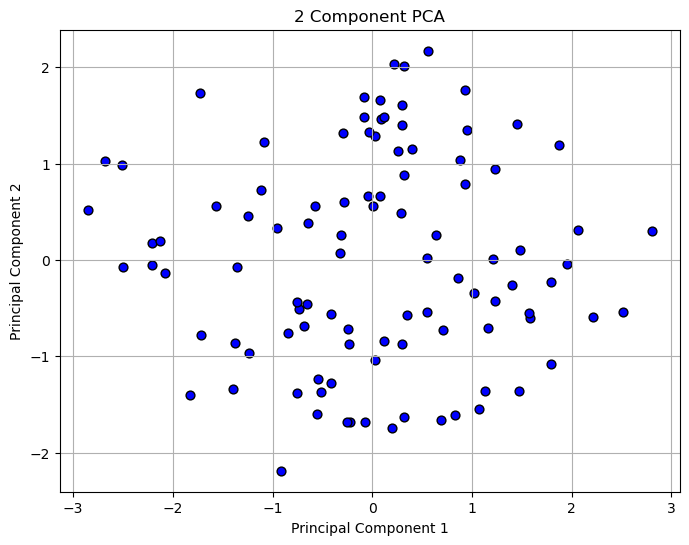

In [29]:
# --------------------------
# 4. Visualización de los resultados
# --------------------------

# Creamos un gráfico de dispersión (como una nube de puntos) para visualizar cómo se ven los datos en las nuevas 2 dimensiones
plt.figure(figsize=(8, 6))  # Definimos el tamaño del gráfico
plt.scatter(
    pca_df['PrincipalComponent 1'],  # Valores del eje X
    pca_df['PrincipalComponent 2'],  # Valores del eje Y
    c='blue',                        # Color de los puntos
    edgecolor='k',                   # Color del borde de cada punto (negro)
    s=40                             # Tamaño de los puntos
)

# Añadimos etiquetas a los ejes y un título al gráfico
plt.xlabel('Principal Component 1')   # Nombre del eje X
plt.ylabel('Principal Component 2')   # Nombre del eje Y
plt.title('2 Component PCA')          # Título del gráfico
plt.grid()                            # Mostramos una cuadrícula de fondo para facilitar la lectura
plt.show()                            # Mostramos el gráfico

In [30]:
# --------------------------
# 5. Mostramos cuánta información se conserva
# --------------------------

# Imprimimos cuánta varianza (información) de los datos originales representa cada componente principal
# Esto nos ayuda a saber si con solo 2 componentes ya tenemos una buena idea de los datos originales
print(f'Varianza explicada por la componente principal 1: {explained_variance[0]:.2f}')
print(f'Varianza explicada por la componente principal 2: {explained_variance[1]:.2f}')

Varianza explicada por la componente principal 1: 0.29
Varianza explicada por la componente principal 2: 0.23
